# EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import radviz

from src.data import make_dataset
from src.models import principal_components as pca


%matplotlib inline
sns.set()

In [2]:
data = make_dataset.get_raw_data()
data.head()

,Recency,Frequency,Amount,Times,Donation
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
data.describe()

,Recency,Frequency,Amount,Times,Donation
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


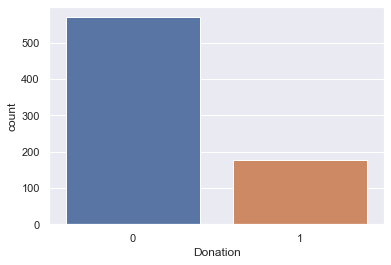

In [4]:
sns.countplot(x='Donation', data=data);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x06AC2B10>,
      dtype=object)

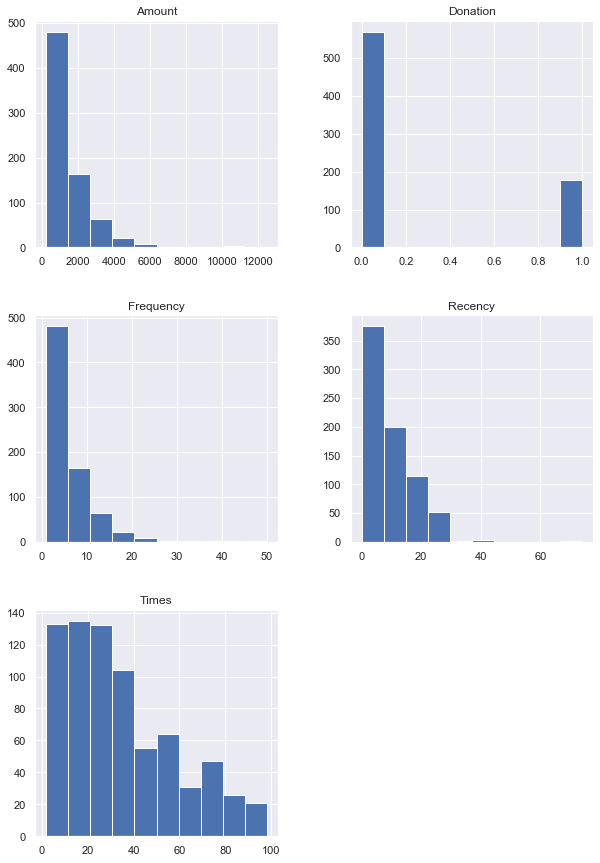

In [5]:
data.hist(figsize=(10,15))


c:\users\bponiecki\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  


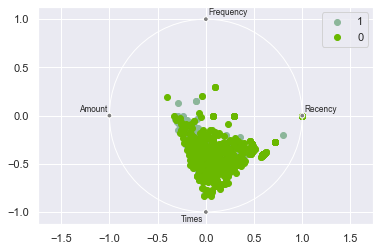

In [6]:
radviz(data, 'Donation')


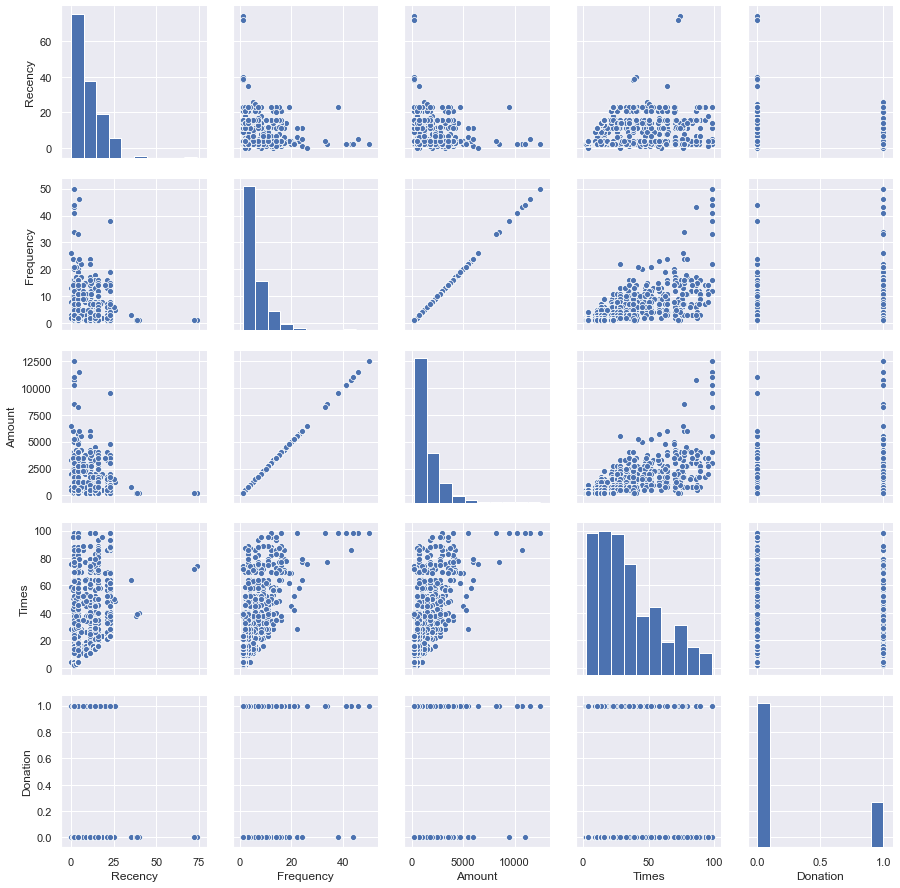

In [7]:
sns.pairplot(data, kind='scatter')
plt.show()

## Histograms

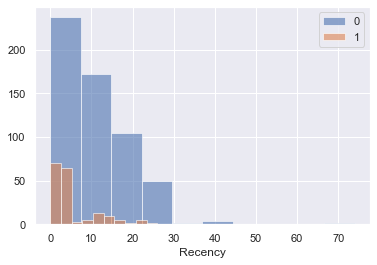

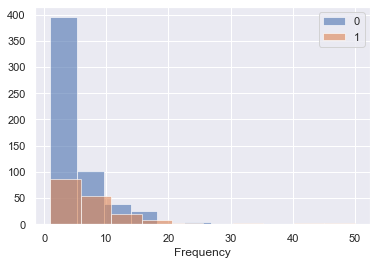

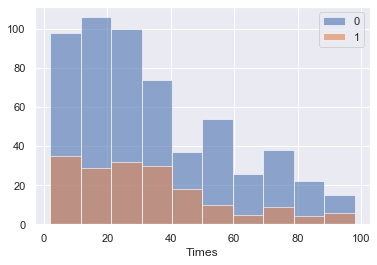

In [8]:
for col in  data.columns[[0,1,3]]:
    groups = data.groupby('Donation')[col]
    fig, ax = plt.subplots()
    
    for k, v in groups:
        v.hist(label=k, alpha=.6, ax=ax)
    
    ax.set_xlabel(col)
    ax.legend()

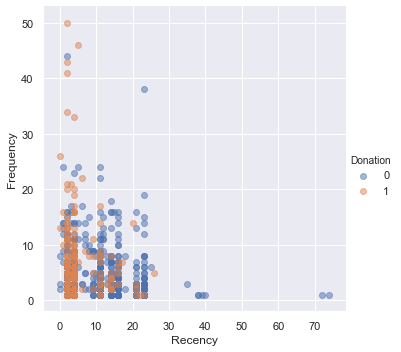

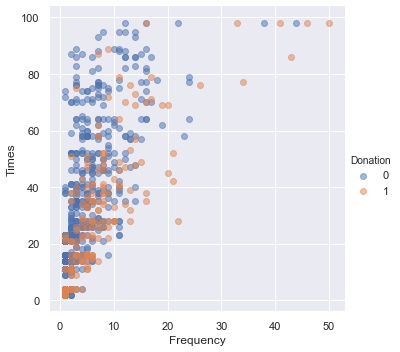

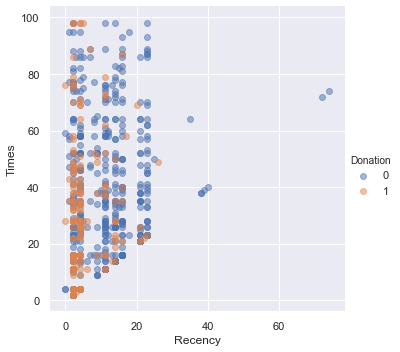

In [9]:
sns.lmplot(x='Recency', y='Frequency', hue='Donation', data=data, fit_reg=False, scatter_kws={'alpha':0.5})
sns.lmplot(x='Frequency', y='Times', hue='Donation', data=data, fit_reg=False, scatter_kws={'alpha':0.5})
sns.lmplot(x='Recency', y='Times', hue='Donation', data=data, fit_reg=False, scatter_kws={'alpha':0.5})


## PCA

In [11]:
df_pca = pca.model(data.iloc[:,[0,1,3]], data['Donation'])

c:\users\bponiecki\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


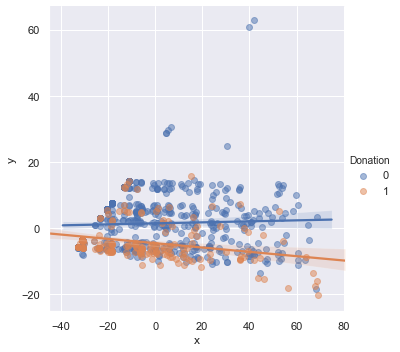

In [12]:
pca.plot(df_pca)